# Trabalho avaliativo

Sistemas de controle II - 2022.4

Controle Digital

**Entrega: 14/12/2022**

Aluno:

Matrícula:



## 1.

*Faça um ensaio dissertativo do seu entendimento sobre controle digital. Procure responder as seguintes perguntas no seu texto:*

* *O que é controle automático digital?* 
* *Qual a diferença entre controle automático digital e analógico?* 
* *O que é necessário para implantar um sistema de controle digital?* 
* *Quais as vantagens do controle digital sobre o analógico? E as desvantagens?* 

*Sua resposta aqui*

## 2.
Execute o código abaixo:

In [4]:
import numpy as np
a = np.random.randint(1,20)
b = np.random.randint(1,20)
print(a)
print(b)

17
2


No problema abaixo, use os valores de "a" e "b" resultantes do código anterior.


*Dado o sistema*
$$
\begin{align}
    G(s) &= \frac{10(s+10)}{(s+a)(s+b)}
\end{align}
$$

1. *Defina um período de amostragem adequado para digitalizar a planta*
2. *Projete um controlador digital que forneça um overshoot de no máximo 15% e um tempo de acomodação no máximo de 1 segundo. Utilize o método de projeto que julgar mais conveniente.*
3. *Obtenha a equação de diferença para implementar o controlador*
4. *Discretize a planta em malha aberta e faça uma simulação em malha fechada com o controlador projetado, para uma referência degrau unitário. Apresente gráficos dos sinais de saída e de controle. Discuta os resultados.*

*Suas respostas e códigos a partir daqui*

In [5]:
import numpy as np
import control as ct
import scipy as sci

In [6]:
num = [10,100]
den = np.convolve([1,1],[1,5])
T = 0.05
G = ct.TransferFunction(num,den)
Gz = ct.c2d(G,T)
(Gz)

TransferFunction(array([ 0.54433991, -0.32857964]), array([ 1.        , -1.73003021,  0.74081822]), 0.05)

In [7]:
B,A=ct.tfdata(Gz)
B = B[0][0]
A = A[0][0]
b = Gz.zeros()[0]

ct.dcgain(Gz)

20.00000000000024

In [8]:
import sympy as sp

z = sp.symbols('z')
Bz = sp.factor(B @ [z,1])

Controlador:
$$
\begin{align}
    C(z) = \frac{s_2z^2+s_1z+s_0}{(z-1)(z−0.603629534321707)r_0}
\end{align}
$$

Malha aberta: 
$$
\begin{align}
    H(z)C(z) = \frac{s_2z^2+s_1z+s_0}{(z-1)(z−0.6036)r_0}\frac{0.5443(z−0.6036)}{z^2−1.73z+0.7408}
\end{align}
$$

In [75]:
r0,r1,r2 = sp.symbols(['r0','r1','r2'])
s0,s1,s2,d0 = sp.symbols(['s0','s1','s2','d0'])
Az = A @ [z**2,z,1]
Bz = B @ [z,1]
Rz = (z-1)*(z**2+r1*z+r0)
Sz = (s2*z**2+s1*z+s0)
malha = sp.collect(sp.expand(Az*Rz+Bz*Sz),z)
malha

1.0*r2*z**5 - 0.328579644220467*s0 + z**4*(1.0*r1 - 2.73003020757212*r2) + z**3*(-2.73003020757212*r1 + 2.47084842825384*r2 + 0.544339906412447*s2 + 1.0) + z**2*(2.47084842825384*r1 - 0.740818220681718*r2 + 0.544339906412447*s1 - 0.328579644220467*s2 - 2.73003020757212) + z*(-0.740818220681718*r1 + 0.544339906412447*s0 - 0.328579644220467*s1 + 2.47084842825384) - 0.740818220681718

In [79]:
Mp = 0.15
ts = 1
xi = -np.log(Mp)/np.sqrt(np.pi**2+np.log(Mp)**2)
wn = 4/(ts*xi)
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
pz = np.exp(p*T)
desejado = sp.expand((z**2-2*np.real(p)*z+np.abs(p)**2)*(Bz)*(Sz))
desejado = sp.collect(desejado,z)
desejado

-19.6741377547295*s0 + 0.544339906412447*s2*z**5 + z**4*(0.544339906412447*s1 + 4.02613960707911*s2) + z**3*(0.544339906412447*s0 + 4.02613960707911*s1 + 29.9644296795832*s2) + z**2*(4.02613960707911*s0 + 29.9644296795832*s1 - 19.6741377547295*s2) + z*(29.9644296795832*s0 - 19.6741377547295*s1)

In [94]:
eq = [sp.Eq(malha.coeff(z,n), desejado.coeff(z,n)) for n in range(5)]


In [86]:
sol = sp.solve(eq)
sol

{r1: 0.135885340464331,
 r2: 0.0169853460768739,
 s0: 0.0369363552662150,
 s1: -0.0663465585720845,
 s2: 0.0312035657808342}

In [93]:
#sp.Eq(malha.subs(sol),desejado.subs(sol))
#sp.solve(malha.subs(sol))
sp.solve(desejado.subs(sol))

[0.603629534321703,
 -4.0 - 6.62391979130149*I,
 -4.0 + 6.62391979130149*I,
 1.06312462873772 - 0.231275332205558*I,
 1.06312462873772 + 0.231275332205558*I]

In [88]:
Cz = (Sz/(Rz))
Cz = Cz.subs(sol)
numZ = sp.numer(Cz)
denZ = sp.denom(Cz)
S = np.array(numZ.as_poly(z).coeffs(),dtype=float)
R = np.array(denZ.as_poly(z).coeffs(),dtype=float)
C = ct.TransferFunction(S,R,T)
C

TransferFunction(array([ 0.03120357, -0.06634656,  0.03693636]), array([ 0.01698535,  0.11889999,  0.86411466, -1.        ]), 0.05)

In [89]:
Cz

(0.0312035657808342*z**2 - 0.0663465585720845*z + 0.036936355266215)/((z - 1)*(0.0169853460768739*z**2 + 0.135885340464331*z + 1))

In [90]:
m=(1+(Bz/Az)*Cz).as_numer_denom()[0]
sp.expand(m)
sp.solve(m)

[0.770293347136040,
 -4.0000699550345 - 6.62372368360133*I,
 -4.0000699550345 + 6.62372368360133*I,
 0.97986267736504 - 0.032161974185975*I,
 0.97986267736504 + 0.032161974185975*I]

In [245]:
MF = ct.feedback(ct.series(Gz,C))
t,y = ct.step_response(MF)
#ct.damp(MF)
print(MF.zeros())
#print(MF.poles())
sp.solve(Sz.subs(sol))

[0.7876498 +0.16660367j 0.7876498 -0.16660367j 0.60362953+0.j        ]


[0.787649796890904 - 0.166603666646283*I,
 0.787649796890904 + 0.166603666646283*I]

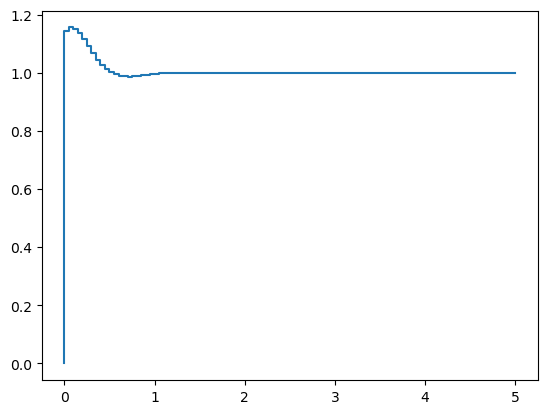

In [237]:
from matplotlib import pyplot as plt
plt.step(t,y)